# Daily Female Births case study
The Daily Female Births dataset describes the number of daily female births in California in 1959. The units are a count and there are 365 observations. The source of the dataset is credited to Newton (1988). It is available to download here: https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv.


Load the dataset with pandas directly from its remote repository or download it and place it in your current working directory under the name “daily-total-female-births.csv“.

In [1]:
# I like to keep imports separated
import pandas as pd
import matplotlib.pyplot as plt

from math import sqrt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Configure the url
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv"

# Load the dataset
df = pd.read_csv(url, header=0, index_col="Date", parse_dates=["Date"])

# Set the daily periods for the datetime index
df.index = df.index.to_period("D")

To keep things simple, you can use the same grid of ARIMA hyperparameters as in the example case study in the quest.

In [7]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

Now, write the code to grid search ARIMA parameters on the Daily Female Births dataset.

First, write a function "*evaluate_arima_model(X, arima_order)*" where X is the dataset and arima_order the ARIMA model's parameters order. This function returns the Root Mean Square Error for the model

In [ ]:
# Evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):

	# Initialize the model
	model = ARIMA(X, order=arima_order)

	# Fit the model
	model_fit = model.fit()

	# In-sample prediction
	y_pred = model_fit.predict()

	# Calculate and return MSE
	mse = mean_squared_error(y_pred, X)
	return mse

# Simple test:
print(evaluate_arima_model(df, (2,0,1)))

# 49.00964266077298

# Wow, that's quite good result, actually better from whatever is below as "target solution"

49.00964266077298


In [ ]:
# Now I need to write better evaluation function
# In the last one, I didn't train/test split and didn't do rolling-forecast

def better_validate(dataset, arima_order):
    # Split point for train/validation split (float between 0 to 1)
    split_point = 0.66

    # It's easier to work with list here
    X = dataset.values.tolist()
    # print(f"X size = {len(X)}")

    # Calculate split_index
    split_index = int(len(X) * split_point)

    # Split the dataset to X_train, X_valid
    X_train = X[:split_index]
    X_valid = X[split_index:]

    # We need to keep the history of already trained and predicted values
    # so we can train the next one
    history = list(X_train)
    # print(f"X_train size = {len(X_train)}")
    # print(f"history size = {len(history)}")
    predictions = list()

    # Iterate over validation set
    for x in X_valid:
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()

        y_pred = model_fit.forecast()
        history.append(x)
        predictions.append(y_pred)
        
    mse = mean_squared_error(y_true=X_valid, y_pred=predictions)

    return mse


better_validate(df, (1,1,1))



53.8822777822722

Now, write a function "*evaluate_models(dataset, p_values, d_values, q_values)*" that assesses your ARIMA model for different combinations of p, d and q values on *dataset*.
This function uses the *evaluate_arima_model(X, arima_order)* function to compute the rmse of the ARIMA model for each combination of parameters.
It prints the ARIMA parameters and mean squared error for each configuration successfully evaluated.
**The best mean parameters are reported as ARIMA(6, 1, 0) with a mean squared error of 53.187.**

The final results should look like this:

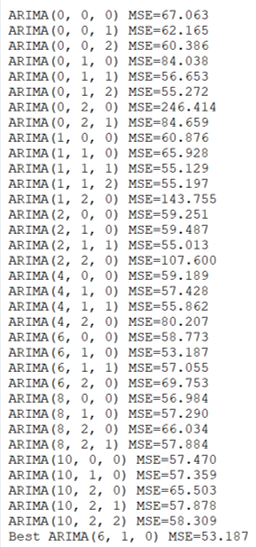

In [ ]:
# Evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):

	# Three nested loops (p,d,q)
	for p in p_values:
		for d in d_values:
			for q in q_values:

				# Calculate MSE of current combination
				try:
					cur_mse = better_validate(dataset, (p,d,q))
				except Exception as e:
					print(e)
					continue
				else:
					# Output
					print(f"ARIMA{(p, d, q)} MSE={cur_mse}")
				
				# Simple check if we already have a best_mse
				try:
					best_mse = best_mse * 1
				
				# In case of error (no best_mse defined) ...
				except:
					# We take cur_mse and current combination as best for now
					best_mse = cur_mse
					best_param = (p,d,q)

				# In case of no error, we do usual minimum finding
				else:	
					if  cur_mse < best_mse:
						best_param = (p,d,q)
						best_mse   = cur_mse
	
	# Now we have best parameters and MSE, so we print them out 
	print(f"Best ARIMA{best_param} MSE={best_mse}")

In [ ]:
evaluate_models(df, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=67.06288961965662
ARIMA(0, 0, 1) MSE=62.16460691976198
ARIMA(0, 0, 2) MSE=60.38392780554906
ARIMA(0, 1, 0) MSE=83.744
ARIMA(0, 1, 1) MSE=55.160175138791345
ARIMA(0, 1, 2) MSE=54.04782205272437
ARIMA(0, 2, 0) MSE=245.53599999999793
ARIMA(0, 2, 1) MSE=84.04007070572848
ARIMA(0, 2, 2) MSE=55.57558417441767
ARIMA(1, 0, 0) MSE=60.87485783632316
ARIMA(1, 0, 1) MSE=57.27379223132889
ARIMA(1, 0, 2) MSE=57.01095407647257
ARIMA(1, 1, 0) MSE=65.70325733757822
ARIMA(1, 1, 1) MSE=53.8822777822722
ARIMA(1, 1, 2) MSE=53.71970468595099
ARIMA(1, 2, 0) MSE=143.2439663299927
ARIMA(1, 2, 1) MSE=65.93167848026678
ARIMA(1, 2, 2) MSE=54.86927274575344
ARIMA(2, 0, 0) MSE=59.25106832362801
ARIMA(2, 0, 1) MSE=56.819837518329415
ARIMA(2, 0, 2) MSE=56.65556020629463
ARIMA(2, 1, 0) MSE=59.29119892173967
ARIMA(2, 1, 1) MSE=53.76327616038049
ARIMA(2, 1, 2) MSE=54.10581180739081
ARIMA(2, 2, 0) MSE=107.21938879647664
ARIMA(2, 2, 1) MSE=59.50332112825317
LU decomposition error.
ARIMA(4, 0, 0) MSE=59.

In [8]:
# I NEED TO SEE (some selected models)
model = ARIMA(df, order=(6,1,0))
y_pred_6_1_0 = model.fit().predict(typ="levels")

model = ARIMA(df, order=(6,2,1))
y_pred_6_2_1 = model.fit().predict(typ="levels")

model = ARIMA(df, order=(4,1,2))
y_pred_4_1_2 = model.fit().predict(typ="levels")

model = ARIMA(df, order=(1,1,2))
y_pred_1_1_2 = model.fit().predict(typ="levels")

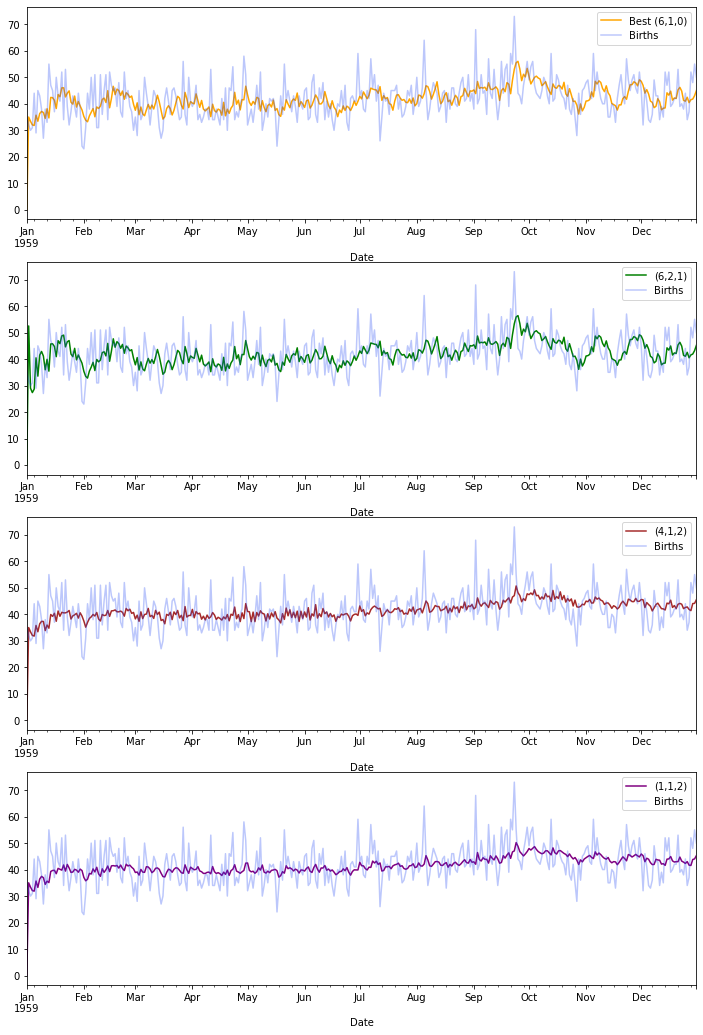

In [9]:
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(12,18))


y_pred_6_1_0.plot(ax=axs[0], color="orange", label="Best (6,1,0)")
y_pred_6_2_1.plot(ax=axs[1], color="green", label="(6,2,1)")
y_pred_4_1_2.plot(ax=axs[2], color="brown", label="(4,1,2)")
y_pred_1_1_2.plot(ax=axs[3], color="purple", label="(1,1,2)")

for ax in axs:
    df.plot(ax=ax, color="#274cf54f", label="Female Births")
    ax.legend()

plt.show()

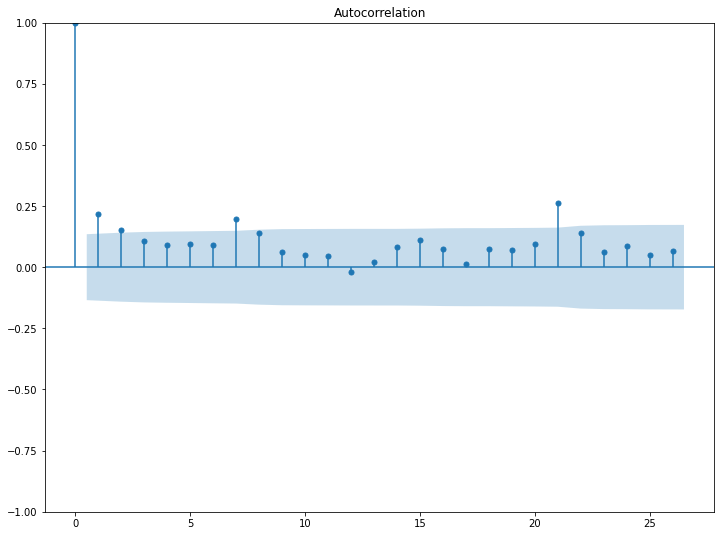

In [ ]:
# Well, there might be some seasonality in weeks?

fig, ax = plt.subplots(figsize=(12,9))

plot_acf(df, ax=ax, alpha=0.01)
plt.show()


In [ ]:
# Summary:

# I wonder why there aren't all combinations of the p, d, q in the "target solution".
# The best combination seems to be (6, 1, 0) with MSE = 53.01 (rounded)

# Why were these combinations left out??

# Also, it'd be interesting to run this with some seasonal parameters as autocorrelation suggests
# some interesting seasonal intervals (7 days, 21 days)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87989bd7-7a25-4e61-b3c0-cb24ea7ca1f8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>